# <p align="center">DS201: Statistical Programming</p>
<p align="center">Assignment 4</p>


<font color="lightgreen">**Name:** Shivam<br>
**Roll No:** 12241710</font>




# Q1.

Consider a random sample X1,X2,...,X10000 drawn from a Poisson distribution with mean θ.
Show that the critical region C defined by ∑10000
i=1 Xi ≥3 is a best critical region for testing
H0 : θ = 0.2 against H1 : θ = 0.6. Determine, for this test, the significance level α and the power
at θ = 0.6

_**1.**_<br>

<font color="lightgreen">Write a Python function to generate a random sample of size 10000 from a Poisson distribution
with mean θ.</font>

Function to Generate Poisson distribution

In [25]:
import math
import numpy as np
import random
import math
from scipy.stats import t

def generate_poisson_distribution(mean_poisson_rate, size):
    """
    Generate random numbers following a Poisson distribution.

    Parameters:
        mean_poisson_rate (float): Average rate of events per interval (λ).
        size (int): Number of random numbers to generate.

    Returns:
        list: List of random numbers following a Poisson distribution.
    """
    poisson_distribution = []
    for _ in range(size):
        k = 0
        p = 1.0
        eminuslamda= math.exp(-mean_poisson_rate)
        while True:
            y = random.uniform(0,1)
            p *= y
            if p > eminuslamda:
                k += 1
            else:
                poisson_distribution.append(k)
                break
    return poisson_distribution

# Example
Poisson_samples with theta=15

In [26]:
theta=15
size=10000
poisson_sample=generate_poisson_distribution(theta, size)
poisson_sample[:10]

[14, 20, 13, 13, 13, 17, 12, 18, 16, 12]

In [27]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

def plot_poisson_distribution(mean_poisson_rate):
        random_numbers = generate_poisson_distribution(mean_poisson_rate, size=10000)
        plt.figure(figsize=(15, 8))
        plt.hist(random_numbers, bins=20, density=True,color='blue', alpha=0.5,edgecolor="black")
        plt.axvline(x=mean_poisson_rate, color='red', linestyle='--', label='Mean = {:.2f}'.format(mean_poisson_rate))
        plt.annotate('Mean = {:.2f}'.format(mean_poisson_rate),
                xy=(mean_poisson_rate, 0.02), xycoords='data',
                xytext=(mean_poisson_rate + 1, 0.03), textcoords='data',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

        plt.title('Poisson Distribution with Mean')
        plt.title('Poisson Distribution (λ={})'.format(mean_poisson_rate))
        plt.xlabel('Number of Events')
        plt.ylabel('Probability Density')
        plt.show()

# Slider for lambda
lambda_slider = widgets.FloatSlider(value=15, min=1, max=20, step=1, description='λ:', continuous_update=False)

# Interactive plot
widgets.interact(plot_poisson_distribution, mean_poisson_rate=lambda_slider);

interactive(children=(FloatSlider(value=15.0, continuous_update=False, description='λ:', max=20.0, min=1.0, st…

_**2.**_<br>

<font color="lightgreen">Define the critical region C as the sum of the sample being greater than or equal to 3.</font>

- The Critical region is defined as a region C in higher dimensions in which the hypothesis $ H_0 $ is rejected if the random sample $ X_1, X_2, ....., X_n $ lies in it.<br>
    Accepted when $ (X_1, X_2,......, X_n) \; \notin \; C $<br>
   Rejected when $ (X_1, X_2,......, X_n) \; \in \; C $<br>

-  There can be 2 types of errors while testing a hypothesis:
  1.  Type 1 error: When $ H_0 $ is correct but we have assumed it to be wrong. This provides us with the significance value alpha.
  The significance level 
 of a statistical hypothesis test is the probability of rejecting the null hypothesis, given that it is true.
  2.  Type 2 error: When $ H_0 $ is wrong but we have taken it to be correct. This provides us with the OC(Operating Characteristic) or (1 - Power)

We have Random Sample $X_{1},X_{2},\dots,X_{n}$ drawn from Poisson.
Then each sample has a pmf of $f(x_{i};\theta)= \dfrac{\theta^{x_i} e^{-\theta}}{{x_{i}!}} , x_{i} = 0,1,2\dots$

Their likelihood function is given as $L(\theta; x_1, x_2, \dots, x_{n}) = \dfrac{e^{-n\theta}\,\theta^{\,\sum\limits_{i=1}^{n}x_i}}{\prod\limits_{i=1}^{n} (x_i!)}$.

For testing our Hypothesis $H_{\circ} : \theta = 0.2 $ against $H_{1} : \theta = 0.6$

$\therefore,$ Using Neyman–Pearson Theorem, for each r.s. $\overrightarrow{x} \in $ Critical region, $C$,
$$\dfrac{L(\theta = 0.2;\overrightarrow{x})}{L(\theta = 0.6;\overrightarrow x)} \le k $$
$$\dfrac{\dfrac{e^{-n(0.2)}\,(0.2)^{\,\sum\limits_{i=1}^{n}x_{i}}}{\prod\limits_{i=1}^{n} (x_i!)}}{\dfrac{e^{-n(0.6)}\,(0.6)^{\,\sum\limits_{i=1}^{n}x_i}}{\prod\limits_{i=1}^{n} (x_i!)}} \le k$$

$$e^{n(0.4)} \cdot \left(\dfrac{1}{3}\right)^{\sum\limits_{i=1}^{n}x_{i}}\le k$$

$$3^{\sum\limits_{i=1}^{n}x_{i}} \ge \frac{e^{0.4n}}{k}$$

$$\sum\limits_{i=1}^{n}x_{i} \ge \dfrac{0.4n-\ln(k)}{\ln(3)}$$

Best Critical Region depends on n as mentioned above, if we choose $ n=10$, we get,
$\sum\limits_{i=1}^{n}x_{i} \ge 3 $
, irrespective of k.


The expected mean for $\sum\limits_{i=1}^{n}x_{i}$ can be taken as $n\theta$.

Let's assume $n=10$ for theoretical analysis. Then group mean at $\theta = 0.2$ becomes $\lambda = 10\cdot0.2=2$.

The Significance Level for the test can be calculated as:
$$\alpha = \gamma_C(\theta=0.2) = P_{\{\theta=0.6\}}(\overrightarrow x \in C)$$
$$=P_{\{\theta=0.2\}}\left(\sum\limits_{i=1}^{10} x_i \geq 3\right)$$
$$= P(x_i \geq 3) = 1 - P(x_i < 3)$$
$$=1 - (P(x = 0) + P(x = 1) + P(x = 2))$$
$$=1-e^{-2}\left(\dfrac{2^0}{0!}+\dfrac{2^1}{1!}+\dfrac{2^2}{2!}\right)$$
$$= 0.32332$$

Then group mean at $\theta = 0.6$ becomes $\lambda = 10\cdot0.6=6$.

The power of test at $\theta = 0.6$ is calculated as:
$$\gamma_{C}(\theta = 0.6) = P_{\{\theta=0.6\}}(\overrightarrow x \in C)$$
$$=P_{\{\theta=0.6\}}\left(\sum\limits_{i=1}^{10} x_i \geq 3\right)$$
$$= P(x_i \geq 3) = 1 - P(x_i < 3)$$
$$=1 - (P(x = 0) + P(x = 1) + P(x = 2))$$
$$=1-e^{-6}\left(\dfrac{6^0}{0!}+\dfrac{6^1}{1!}+\dfrac{6^2}{2!}\right)$$
$$= 0.93803$$

In [28]:
def crticial_test(sample):
    return sum(sample)>=3

In [29]:
sum(poisson_sample)

149884

In [30]:
crticial_test(poisson_sample)

True

_**3.**_<br>

<font color="lightgreen">Perform hypothesis testing by comparing the critical region with the significance level α.</font>

In [31]:
theta_null = 0.2
theta_alt = 0.6

In [32]:
def power_test(theta,sample_size =size, sim=1000):
    """Calculate the power of the test at θ"""
    rej = 0
    for _ in range(sim):
        sample = generate_poisson_distribution(theta, sample_size)
        if crticial_test(sample):
            rej += 1
    power = rej / sim
    return power

In [33]:
alpha = power_test(theta_null, sample_size =10)
print("Significance Level for null hypothesis :",alpha,". Since, it is less than theoretical alpha, we can say null hypothesis is rejected.")

Significance Level for null hypothesis : 0.34 . Since, it is less than theoretical alpha, we can say null hypothesis is rejected.


_**4.**_<br>

<font color="lightgreen">Calculate the power of the test at θ = 0.6</font>

In [34]:
power = power_test(theta_alt,sample_size=10)
print("Power of the test at θ = 0.6:", power)

Power of the test at θ = 0.6: 0.932


# Q2.

Consider a random sample X1,X2,...,X100 drawn from a normal distribution with mean μ and
standard deviation σ. Show that the critical region C defined by  ̄X ≥20 is a best critical region
for testing H0 : μ = 15 against H1 : μ = 18. Determine, for this test, the significance level α and
the power at μ = 18.


_**1.**_<br>

<font color="lightgreen">Write a Python function to generate a random sample of size 100 from a normal distribution
with mean μ and standard deviation σ.</font>

Function to Generate Normal distribution

 The Box-Muller Transform

In [35]:
import numpy as np
def generate_normal_distribution(mean, sigma, size):
    a = np.random.rand(size)
    b = np.random.rand(size)

    z = np.sqrt(-2 * np.log(a)) * np.cos(2 * np.pi * b)

    return mean + sigma * z

# Example:

In [36]:
mean = 15
sigma=3
size = 100

normal_random_numbers = generate_normal_distribution(mean, sigma,size)

print("Generated random numbers:",normal_random_numbers[:10])

Generated random numbers: [12.03765064 13.84830969 14.83631728 13.83303872 18.29212624 14.44906235
 14.2053459  14.58579179 20.68733136 13.19590822]


Text(0, 0.5, 'Frequency')

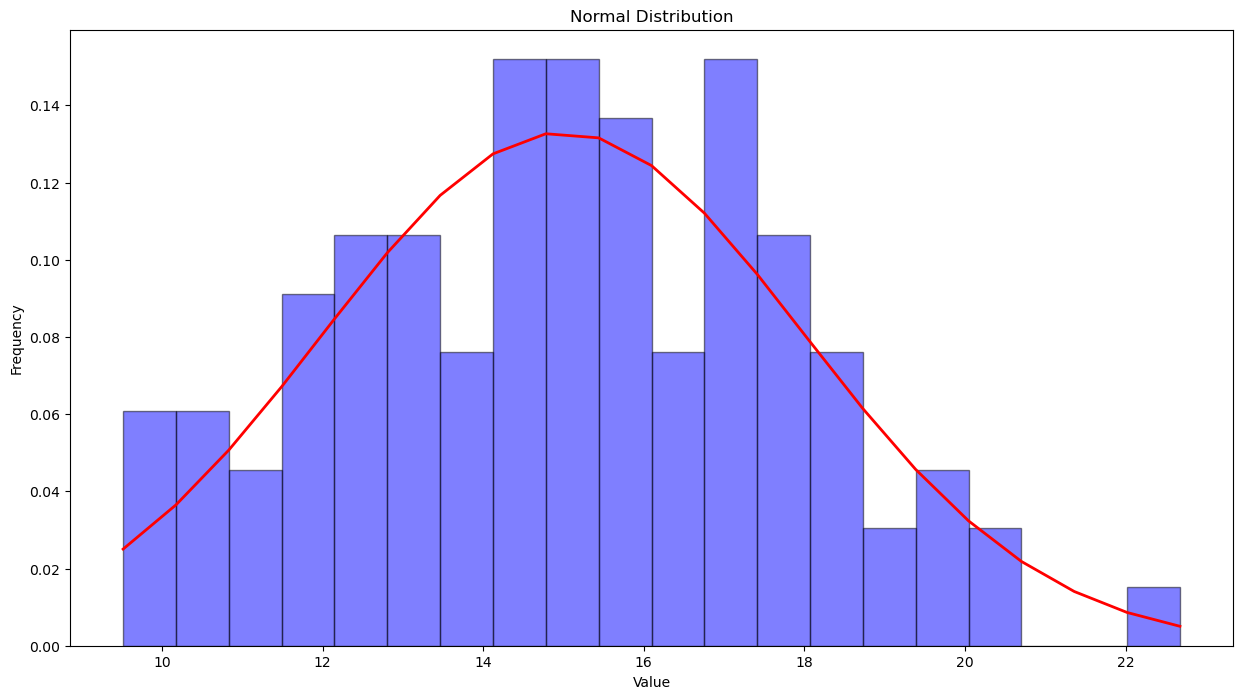

In [37]:
plt.figure(figsize=(15, 8))
count, bins, ignored=plt.hist(normal_random_numbers, bins=20, density=True,color='blue', alpha=0.5,edgecolor="black")
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

_**2.**_<br>

<font color="lightgreen">Define the critical region C as the sample mean (x̄)being greater than or equal to 20.</font>

We have Random Sample $X_{1},X_{2},\dots,X_{100}$ drawn from Gaussian, where each $X_i$ follows $f(x_i)=\dfrac{1}{\sqrt{2\pi}\sigma}e^{-\dfrac{1}{2}\left(\dfrac{x_i-\mu}{\sigma}\right)^2}$.

The likelihood of the sample is given by $L(\theta;\overrightarrow x) = \left(\dfrac{1}{\sqrt{2\pi}\sigma}\right)^{100} e^{\dfrac{-1}{2}\sum\limits_{i=1}^{100}\left(\dfrac{x_i-\mu}{\sigma}\right)^2}$.

Employing the same method as in Q1 for testing hypothesis $H_{\circ}:\mu=15$ against $H_1:\mu=18$, we assume for some $k\ge0$,

$$\dfrac{L(\mu = 15;\overrightarrow{x})}{L(\mu = 18;\overrightarrow x)} \le k $$
$$\dfrac{\left(\dfrac{1}{\sqrt{2\pi}\sigma}\right)^{100} e^{\sum\limits_{i=1}^{100}\left(\dfrac{x_i-15}{\sigma}\right)^2}}{\left(\dfrac{1}{\sqrt{2\pi}\sigma}\right)^{100} e^{\sum\limits_{i=1}^{100}\left(\dfrac{x_i-18}{\sigma}\right)^2}}\le k$$

$$e^{\dfrac{-1}{2\sigma^2}\sum\limits_{i=1}^{100}(x_i-15)^2-(x_i-18)^2}\le k$$
$$\dfrac{-1}{2\sigma ^2}\sum\limits_{i=1}^{100}(2x_i-33)(3) \le \ln(k)$$
$$200 \bar X - 3300\ge \dfrac{-2\sigma^2}{3}\ln(k)$$
$$\bar X \ge \dfrac{3300}{200}-\dfrac{\sigma^2}{300}\ln(k)$$

Approximately, $$\bar X \ge 20$$

Define Critical region $C$ as $\bar X\ge 20$.

Assuming $\sigma = 10$ for simplicity, we can find significance level as
$$\alpha = P_{\mu=15}(\bar X \notin C)$$
$$=P_{\mu=15}(\bar X \le 20)$$
$$= P_{\mu=15}\left(\dfrac{\bar X-15}{10/10} \le \dfrac{20-15}{10/10} \right)$$
$$=\Phi(5)$$
$$\approx 1$$

For finding power of test at $\mu = 18$, we need
$$\gamma_C(\mu=18) = P_{\mu=18}(\bar X \in C)$$
$$=P_{\mu=18}(\bar X \ge 20)$$
$$= P_{\mu=18}\left(\dfrac{\bar X-18}{10/10} \ge \dfrac{20-18}{10/10} \right)$$
$$=1-\Phi(2)$$
$$=0.02275$$

In [38]:
def crticial_test_2(sample):
    return np.mean(sample) >= 20

In [39]:
sum(normal_random_numbers)/100

15.021145326829382

In [40]:
crticial_test_2(normal_random_numbers)

False

_**3.**_<br>

<font color="lightgreen">Perform hypothesis testing by comparing the critical region with the significance level α.</font>

In [41]:
def power_test_2(mu,sample_size =100, sim=1000):
    """Calculate the power of the test at θ"""
    rej = 0
    for _ in range(sim):
        sample = generate_normal_distribution(mu, 10, sample_size)
        if crticial_test(sample):
            rej += 1
    power = rej / sim
    return power

In [42]:
mu_null = 15
mu_alt = 18

In [43]:
alpha = power_test_2(mu_null, sample_size =100)
print("Significance Level for null hypothesis :",alpha,". Since, it is less than theoretical alpha, we can say null hypothesis is accepted.")

Significance Level for null hypothesis : 1.0 . Since, it is less than theoretical alpha, we can say null hypothesis is accepted.


_**4.**_<br>

<font color="lightgreen">Calculate the power of the test at μ = 18.</font>

In [44]:
power = power_test_2(mu_alt,sample_size=100)
print("Power of the test at μ = 18:", power)

Power of the test at μ = 18: 1.0


# Q3.

In a study on music’s effect on memory, 40 participants are split: one group listens to classical
music while studying, and the other studies silently. After a memory test, scores are recorded.
Scores of the classical music group:

78, 82, 85, 79, 81, 83, 80, 77, 79, 84, 76, 82, 80, 81, 83, 78, 82, 79, 81, 83,77, 80, 81, 84, 79, 82, 80,
82, 83, 78, 75, 78, 82, 83, 76, 80, 82, 84, 77, 79

The mean score before the study is 75. Researchers hypothesize that listening to classical music
improves memory, leading to a sample mean significantly higher than 75.

Test if the sample mean is significantly different from 75 at the 0.05 level. Report p value.

After review, one score of 85 was mistakenly recorded as 75. Are the corrected scores significantly
different from 75 at the 0.05 level?

In [45]:
# Original scores
scores = [78, 82, 85, 79, 81, 83, 80, 77, 79, 84, 76, 82, 80, 81, 83, 78, 82, 79, 81, 83, 77, 80, 81, 84, 79, 82, 80, 82, 83, 78, 75, 78, 82, 83, 76, 80, 82, 84, 77, 79]


In [46]:
def t_test(true, sample):
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    n = len(sample)
    t_val = (mean - true) / (std / np.sqrt(n))
    
    return t_val

In [47]:
def p_test(t_val, df):
    p_value = 2 * (1 - t.cdf(np.abs(t_val), df))
    
    return p_value

In [48]:
true_mean=75
sample_mean = np.mean(scores)

t_statistic = t_test(true_mean, scores)
p_value = p_test(t_statistic, len(scores)-1)

print("Original Scores:")
print("Sample Mean:", sample_mean)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Original Scores:
Sample Mean: 80.375
T-Statistic: 13.443560663316497
P-Value: 4.440892098500626e-16


In [49]:
# Corrected scores: replacing 85 with the correct value
corrected_scores = [78, 82, 75, 79, 81, 83, 80, 77, 79, 84, 76, 82, 80, 81, 83, 78, 82, 79, 81, 83, 77, 80, 81, 84, 79, 82, 80, 82, 83, 78, 75, 78, 82, 83, 76, 80, 82, 84, 77, 79]

# Sample statistics
corrected_sample_mean = np.mean(corrected_scores)
corrected_sample_std = np.std(corrected_scores, ddof=1)  

# Calculate t-statistic
corrected_t_statistic = t_test(true_mean, corrected_scores)


# Calculate p-value
corrected_p_value = p_test(corrected_t_statistic, len(scores)-1)

print("\nCorrected Scores:")
print("Sample Mean:", corrected_sample_mean)
print("T-Statistic:", corrected_t_statistic)
print("P-Value:", corrected_p_value)



Corrected Scores:
Sample Mean: 80.125
T-Statistic: 12.69167538501612
P-Value: 1.9984014443252818e-15


# Refrences

* https://www.vaia.com/en-us/textbooks/math/introduction-to-mathematical-statistics-8-edition/chapter-8/problem-10-let-x1-x2-ldots-x10-denote-a-random-sample-of-siz/ <br>
* https://online.stat.psu.edu/stat415/lesson/25/25.1

<p align='center'>***</p>